# Linear Regression - Challenge: Pokémon Identification

## Overview

In this notebook, we will walk through a simple example of linear regression using a Pokémon dataset. No prior knowledge of linear regression is assumed. We will:
- Introduce the concept of linear regression
- Load and inspect the Pokémon data
- Visualize relationships between Pokémon features and legendary status
- Prepare the data and train a linear regression model
- Evaluate model performance and interpret the results

**Can we predict whether a Pokémon is legendary based on its characteristics?**

## Setting Up Our Data Tools

Before we start working with any data, we need to bring in some helpful tools. These tools let us:
  1. Load and organize information (like a digital spreadsheet).
  2. Create pictures and charts to see patterns.
  3. Build a simple model to make predictions.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, classification_report, 
                            confusion_matrix, roc_curve, roc_auc_score)
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Loading Our Data Sets

 Now that our tools are ready, we need to bring in the actual information
 we’ll work with. These files are in CSV format (think of them as simple
 text-based spreadsheets).


In [2]:
# ============================
# 1. DATA LOADING AND EXPLORATION
# ============================

print("=" * 60)
print("POKEMON LEGENDARY PREDICTION ANALYSIS")
print("=" * 60)

# Load the dataset
df = pd.read_csv('Data/Pokemon.csv')

print("\n1. DATASET OVERVIEW")
print("-" * 60)
print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())

print(f"\nDataset Info:")
print(df.info())

print(f"\nBasic Statistics:")
print(df.describe())

# Check for missing values
print(f"\nMissing Values:")
print(df.isnull().sum())

POKEMON LEGENDARY PREDICTION ANALYSIS

1. DATASET OVERVIEW
------------------------------------------------------------
Dataset shape: (800, 13)

First few rows:
   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 t

# Data Preprocessing

 We do the following preprocessing: 
  1. Check legendary distribution 
  2. Select numeric features for prediction
  3. Create feature matrix X and target vector y
  4. Convert boolean to binary (if necessary)



In [3]:
# ============================
# 2. DATA PREPROCESSING
# ============================

print("\n2. DATA PREPROCESSING")
print("-" * 60)

# Check legendary distribution
print(f"\nLegendary Distribution:")
print(df['Legendary'].value_counts())
print(f"\nLegendary Percentage:")
print(df['Legendary'].value_counts(normalize=True) * 100)

# Select numeric features for prediction
# We'll use the stats as features: Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Generation
feature_columns = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']
target_column = 'Legendary'

# Create feature matrix X and target vector y
X = df[feature_columns].copy()
y = df[target_column].copy()

# Convert boolean to binary (if necessary)
y = y.astype(int)

print(f"\nFeatures selected: {feature_columns}")
print(f"Target variable: {target_column}")
print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")


2. DATA PREPROCESSING
------------------------------------------------------------

Legendary Distribution:
Legendary
False    735
True      65
Name: count, dtype: int64

Legendary Percentage:
Legendary
False    91.875
True      8.125
Name: proportion, dtype: float64

Features selected: ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']
Target variable: Legendary

Feature matrix shape: (800, 8)
Target vector shape: (800,)


# Exploratory Data Analysis
1. Compare stats between legendary and non-legendary
2. Visualize the distribution
3. Correlation heatmap


3. EXPLORATORY DATA ANALYSIS
------------------------------------------------------------

Statistics by Legendary Status:
                Total         HP      Attack    Defense     Sp. Atk  \
Legendary                                                             
False      417.213605  67.182313   75.669388  71.559184   68.454422   
True       637.384615  92.738462  116.676923  99.661538  122.184615   

              Sp. Def       Speed  Generation  
Legendary                                      
False       68.892517   65.455782    3.284354  
True       105.938462  100.184615    3.769231  


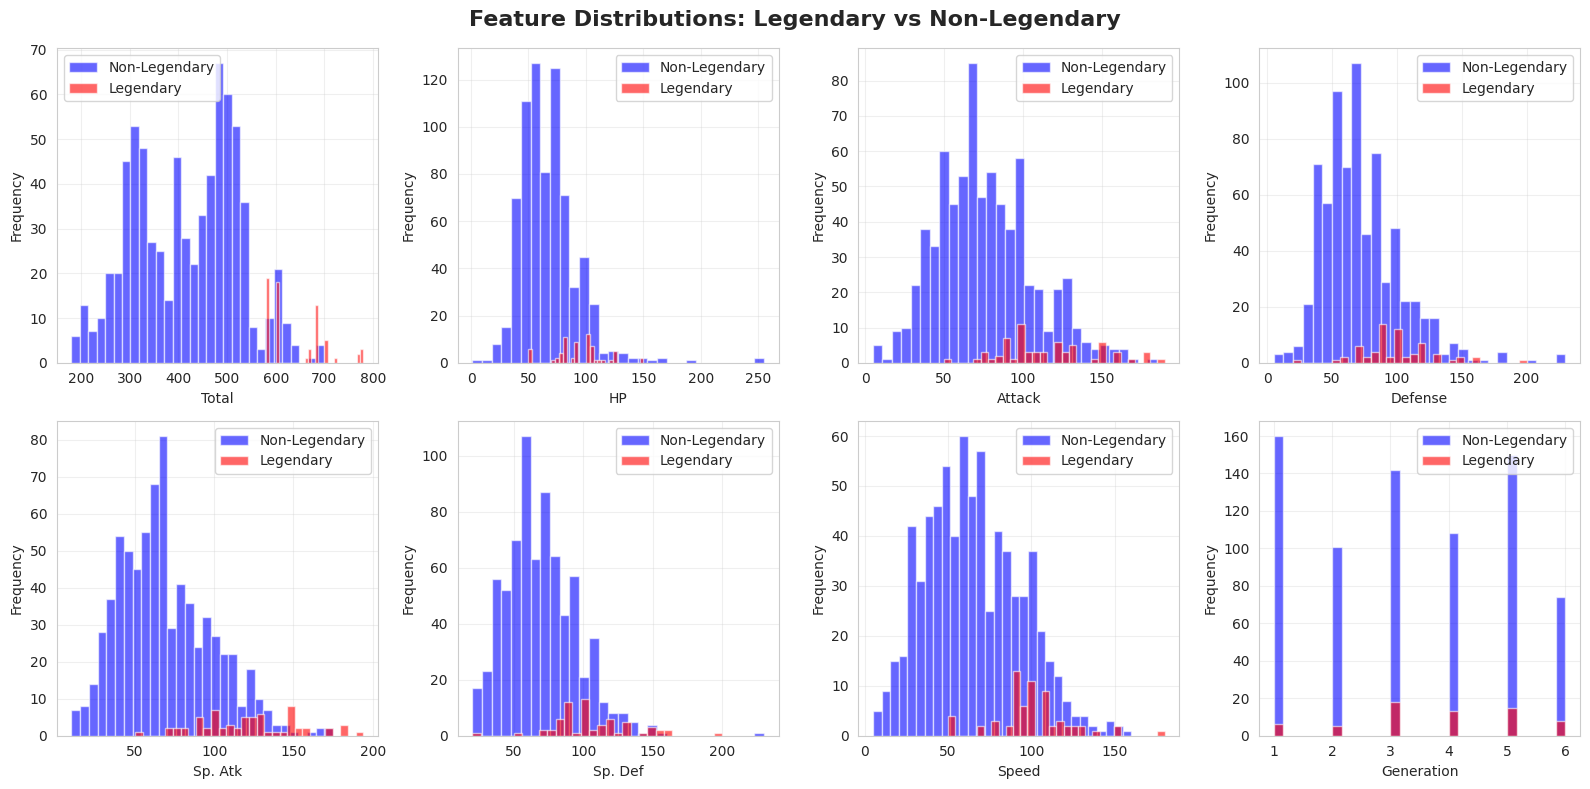

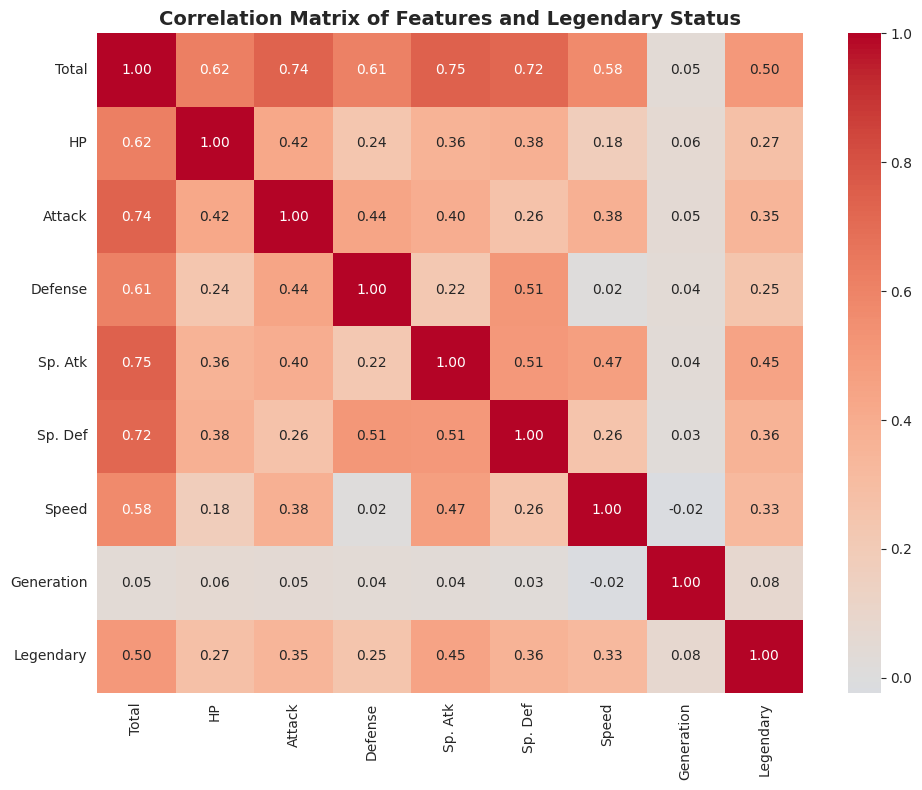


Correlation with Legendary Status:
Legendary     1.000000
Total         0.501758
Sp. Atk       0.448907
Sp. Def       0.363937
Attack        0.345408
Speed         0.326715
HP            0.273620
Defense       0.246377
Generation    0.079794
Name: Legendary, dtype: float64


In [4]:
# ============================
# 3. EXPLORATORY DATA ANALYSIS
# ============================

print("\n3. EXPLORATORY DATA ANALYSIS")
print("-" * 60)

# Compare stats between legendary and non-legendary
print("\nStatistics by Legendary Status:")
print(df.groupby('Legendary')[feature_columns].mean())

# Visualize the distribution
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Feature Distributions: Legendary vs Non-Legendary', fontsize=16, fontweight='bold')

for idx, col in enumerate(feature_columns):
    row = idx // 4
    col_idx = idx % 4
    ax = axes[row, col_idx]
    
    df[df['Legendary'] == False][col].hist(ax=ax, alpha=0.6, label='Non-Legendary', bins=30, color='blue')
    df[df['Legendary'] == True][col].hist(ax=ax, alpha=0.6, label='Legendary', bins=30, color='red')
    
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_data = df[feature_columns + [target_column]].copy()
correlation_data['Legendary'] = correlation_data['Legendary'].astype(int) if 'Legendary' in correlation_data.columns else y
correlation_matrix = correlation_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Features and Legendary Status', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\nCorrelation with Legendary Status:")
print(correlation_matrix['Legendary'].sort_values(ascending=False))


# Test-Train Split

In [5]:
# ============================
# 4. TRAIN-TEST SPLIT
# ============================

print("\n4. TRAIN-TEST SPLIT")
print("-" * 60)

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"\nTraining set legendary distribution:")
print(pd.Series(y_train).value_counts())
print(f"\nTest set legendary distribution:")
print(pd.Series(y_test).value_counts())



4. TRAIN-TEST SPLIT
------------------------------------------------------------
Training set size: 640 samples
Test set size: 160 samples

Training set legendary distribution:
Legendary
0    588
1     52
Name: count, dtype: int64

Test set legendary distribution:
Legendary
0    147
1     13
Name: count, dtype: int64


# Feature Scaling
Standardize features (important for logistic regression)

In [6]:
# ============================
# 5. FEATURE SCALING
# ============================

print("\n5. FEATURE SCALING")
print("-" * 60)

# Standardize features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features have been standardized (mean=0, std=1)")
print(f"Training set mean: {X_train_scaled.mean(axis=0).round(2)}")
print(f"Training set std: {X_train_scaled.std(axis=0).round(2)}")



5. FEATURE SCALING
------------------------------------------------------------
Features have been standardized (mean=0, std=1)
Training set mean: [ 0.  0. -0. -0.  0.  0. -0.  0.]
Training set std: [1. 1. 1. 1. 1. 1. 1. 1.]


# Model Training

In [7]:
# ============================
# 6. MODEL TRAINING
# ============================

print("\n6. LOGISTIC REGRESSION MODEL TRAINING")
print("-" * 60)

# Create and train the logistic regression model
# Using class_weight='balanced' to handle class imbalance
model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
model.fit(X_train_scaled, y_train)

print("Model training completed!")
print(f"\nModel coefficients:")
coef_df = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': model.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)
print(coef_df)
print(f"\nIntercept: {model.intercept_[0]:.4f}")


6. LOGISTIC REGRESSION MODEL TRAINING
------------------------------------------------------------
Model training completed!

Model coefficients:
      Feature  Coefficient
6       Speed     1.759681
0       Total     1.569739
4     Sp. Atk     1.326441
5     Sp. Def     1.296700
3     Defense     0.905328
1          HP     0.891213
7  Generation     0.513431
2      Attack     0.306308

Intercept: -6.5303


# Model Evaluation
1. Make predictions
2. Get probability predictions
3. Calculate accuracy
4. Detailed classification report
5. Confusion Matrix
6. ROC Curve and AUC


7. MODEL EVALUATION
------------------------------------------------------------
Training Accuracy: 0.9406 (94.06%)
Test Accuracy: 0.9187 (91.88%)

CLASSIFICATION REPORT (Test Set)
               precision    recall  f1-score   support

Non-Legendary       0.99      0.92      0.95       147
    Legendary       0.50      0.92      0.65        13

     accuracy                           0.92       160
    macro avg       0.75      0.92      0.80       160
 weighted avg       0.95      0.92      0.93       160



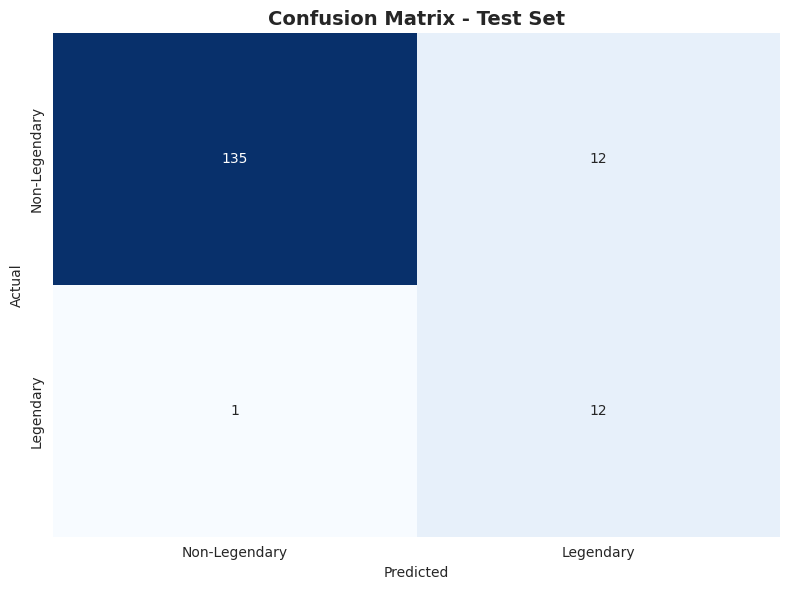


Confusion Matrix Breakdown:
True Negatives (Correctly predicted Non-Legendary): 135
False Positives (Incorrectly predicted as Legendary): 12
False Negatives (Incorrectly predicted as Non-Legendary): 1
True Positives (Correctly predicted Legendary): 12


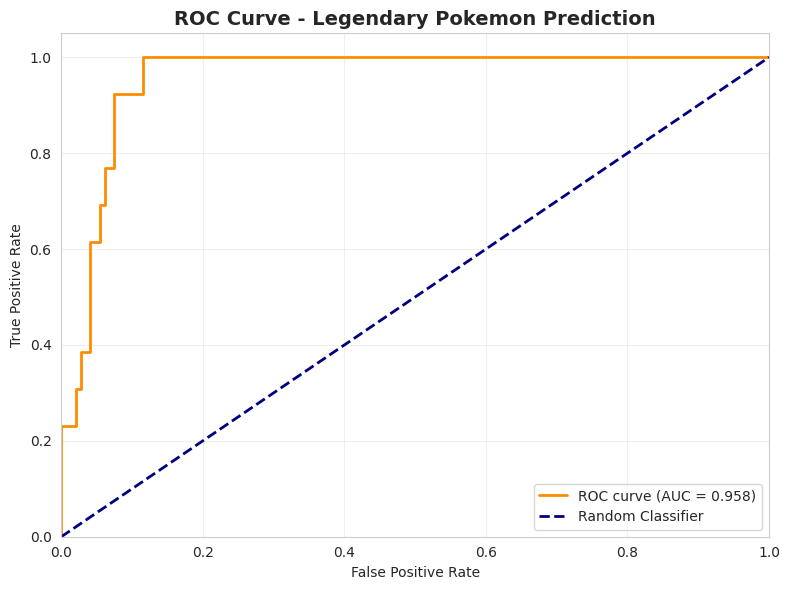


ROC-AUC Score: 0.9576


In [8]:
# ============================
# 7. MODEL EVALUATION
# ============================

print("\n7. MODEL EVALUATION")
print("-" * 60)

# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Get probability predictions
y_train_prob = model.predict_proba(X_train_scaled)[:, 1]
y_test_prob = model.predict_proba(X_test_scaled)[:, 1]

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Detailed classification report
print("\n" + "="*60)
print("CLASSIFICATION REPORT (Test Set)")
print("="*60)
print(classification_report(y_test, y_test_pred, target_names=['Non-Legendary', 'Legendary']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Set', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.xticks([0.5, 1.5], ['Non-Legendary', 'Legendary'])
plt.yticks([0.5, 1.5], ['Non-Legendary', 'Legendary'])
plt.tight_layout()
plt.show()

print(f"\nConfusion Matrix Breakdown:")
print(f"True Negatives (Correctly predicted Non-Legendary): {cm[0, 0]}")
print(f"False Positives (Incorrectly predicted as Legendary): {cm[0, 1]}")
print(f"False Negatives (Incorrectly predicted as Non-Legendary): {cm[1, 0]}")
print(f"True Positives (Correctly predicted Legendary): {cm[1, 1]}")

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
auc_score = roc_auc_score(y_test, y_test_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Legendary Pokemon Prediction', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nROC-AUC Score: {auc_score:.4f}")

# Feature Importance


8. FEATURE IMPORTANCE ANALYSIS
------------------------------------------------------------


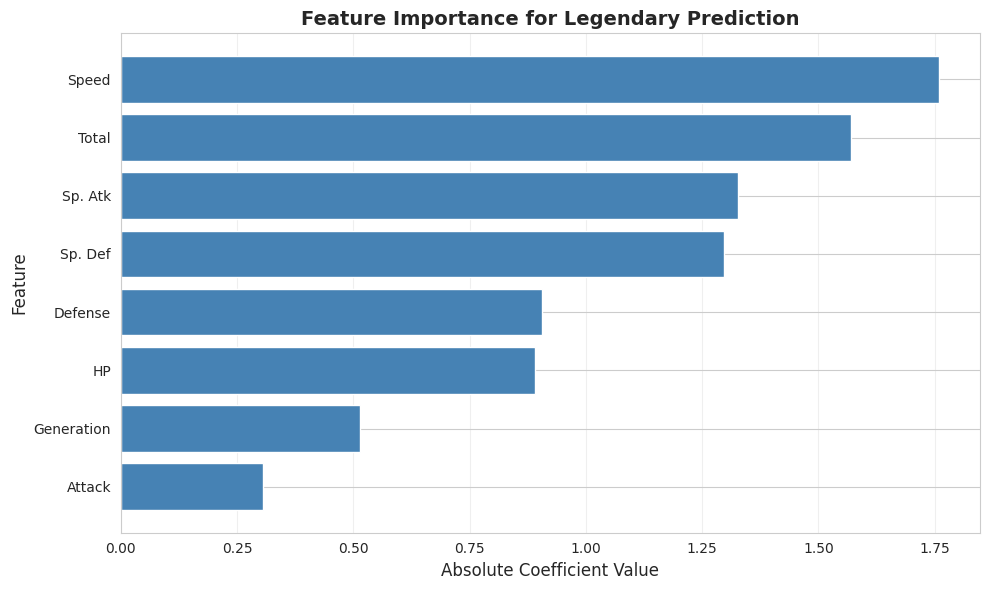


Most Important Features:
      Feature  Importance
6       Speed    1.759681
0       Total    1.569739
4     Sp. Atk    1.326441
5     Sp. Def    1.296700
3     Defense    0.905328
1          HP    0.891213
7  Generation    0.513431
2      Attack    0.306308


In [9]:
# ============================
# 8. FEATURE IMPORTANCE
# ============================

print("\n8. FEATURE IMPORTANCE ANALYSIS")
print("-" * 60)

# Visualize feature importance (absolute coefficient values)
plt.figure(figsize=(10, 6))
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': np.abs(model.coef_[0])
}).sort_values('Importance', ascending=True)

plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='steelblue')
plt.xlabel('Absolute Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importance for Legendary Prediction', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\nMost Important Features:")
print(feature_importance.sort_values('Importance', ascending=False))


# Example Predictions

In [10]:
# ============================
# 9. EXAMPLE PREDICTIONS
# ============================

print("\n9. EXAMPLE PREDICTIONS")
print("-" * 60)

# Show some example predictions
n_examples = 10
example_indices = np.random.choice(X_test.index, n_examples, replace=False)

print(f"\nShowing {n_examples} random predictions from test set:\n")
for idx in example_indices:
    actual = df.loc[idx, 'Legendary']
    predicted = y_test_pred[X_test.index.get_loc(idx)]
    probability = y_test_prob[X_test.index.get_loc(idx)]
    name = df.loc[idx, 'Name']
    total_stats = df.loc[idx, 'Total']
    
    status = "✓" if actual == predicted else "✗"
    print(f"{status} {name:20s} | Actual: {actual:5} | Predicted: {predicted:5} | "
          f"Probability: {probability:.2%} | Total Stats: {total_stats}")


9. EXAMPLE PREDICTIONS
------------------------------------------------------------

Showing 10 random predictions from test set:

✓ Ivysaur              | Actual:     0 | Predicted:     0 | Probability: 0.03% | Total Stats: 405
✓ Tauros               | Actual:     0 | Predicted:     0 | Probability: 1.26% | Total Stats: 490
✓ Fraxure              | Actual:     0 | Predicted:     0 | Probability: 0.02% | Total Stats: 410
✓ Pachirisu            | Actual:     0 | Predicted:     0 | Probability: 0.22% | Total Stats: 405
✓ Slugma               | Actual:     0 | Predicted:     0 | Probability: 0.00% | Total Stats: 250
✓ Chandelure           | Actual:     0 | Predicted:     0 | Probability: 40.03% | Total Stats: 520
✓ LandorusTherian Forme | Actual:     1 | Predicted:     1 | Probability: 74.39% | Total Stats: 600
✓ Mareep               | Actual:     0 | Predicted:     0 | Probability: 0.00% | Total Stats: 280
✗ GalladeMega Gallade  | Actual:     0 | Predicted:     1 | Probability: 84.47% |

# Conclusion

In [11]:
# ============================
# 10. CONCLUSION
# ============================

print("\n" + "="*60)
print("CONCLUSION")
print("="*60)

print(f"""
Based on the logistic regression analysis:

1. Model Performance:
   - Test Accuracy: {test_accuracy*100:.2f}%
   - ROC-AUC Score: {auc_score:.4f}

2. Key Findings:
   - The model can predict legendary status with {test_accuracy*100:.1f}% accuracy
   - Most important features: {', '.join(feature_importance.sort_values('Importance', ascending=False).head(3)['Feature'].tolist())}
   
3. Answer to Research Question:
   YES, we CAN predict whether a Pokémon is legendary based on its 
   characteristics with reasonable accuracy. Legendary Pokémon tend to have
   significantly higher stats compared to non-legendary Pokémon.

4. Model Insights:
   - Legendary Pokémon generally have higher Total stats
   - Stats like {feature_importance.iloc[-1]['Feature']} and {feature_importance.iloc[-2]['Feature']} are strong predictors
   - The model successfully identifies most legendary Pokémon in the test set
""")


CONCLUSION

Based on the logistic regression analysis:

1. Model Performance:
   - Test Accuracy: 91.88%
   - ROC-AUC Score: 0.9576

2. Key Findings:
   - The model can predict legendary status with 91.9% accuracy
   - Most important features: Speed, Total, Sp. Atk

3. Answer to Research Question:
   YES, we CAN predict whether a Pokémon is legendary based on its 
   characteristics with reasonable accuracy. Legendary Pokémon tend to have
   significantly higher stats compared to non-legendary Pokémon.

4. Model Insights:
   - Legendary Pokémon generally have higher Total stats
   - Stats like Speed and Total are strong predictors
   - The model successfully identifies most legendary Pokémon in the test set

